## Prepare dataset

In [41]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [42]:
from keras.datasets import mnist

In [43]:
(X_train,y_train),(X_test,y_test) = mnist.load_data('/Users/ellen/GitHub/DeepLearningProjects/dataset/mnist.npz')

In [44]:
X_train.shape

(60000, 28, 28)

In [45]:
X_test.shape

(10000, 28, 28)

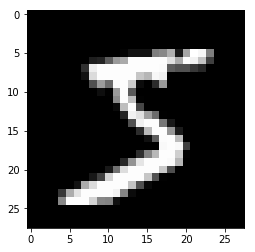

In [46]:
plt.imshow(X_train[0],cmap='gray')

In [47]:
# X_train[0]

In [48]:
X_train = X_train.reshape(-1,28*28).astype('float32')/255.0
X_test  = X_test.reshape(-1,28*28).astype('float32')/255.0

In [49]:
# X_test[0]
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [50]:
from keras.utils.np_utils import to_categorical

In [51]:
y_train_cat = to_categorical(y_train)
y_test_cat  = to_categorical(y_test)

In [52]:
y_train_cat[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

In [53]:
y_train_cat.shape

(60000, 10)

## Fully connected on images

In [61]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K

In [58]:
K.clear_session()

In [59]:
model = Sequential()
model.add(Dense(512,input_dim=28*28,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [60]:
h = model.fit(X_train, y_train_cat, 
              batch_size=128, 
              epochs=10, 
              verbose=1, 
              validation_split=0.3)

# loss: 0.0170 - acc: 0.9949 - 
# val_loss: 0.1572 - val_acc: 0.9730

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 7s - loss: 0.3197 - acc: 0.9007 - val_loss: 0.2525 - val_acc: 0.9224
Epoch 2/10
42000/42000 [==============================] - 7s - loss: 0.1133 - acc: 0.9649 - val_loss: 0.1326 - val_acc: 0.9612
Epoch 3/10
42000/42000 [==============================] - 8s - loss: 0.0733 - acc: 0.9775 - val_loss: 0.1602 - val_acc: 0.9572
Epoch 4/10
42000/42000 [==============================] - 7s - loss: 0.0550 - acc: 0.9829 - val_loss: 0.0997 - val_acc: 0.9738
Epoch 5/10
42000/42000 [==============================] - 7s - loss: 0.0404 - acc: 0.9878 - val_loss: 0.1174 - val_acc: 0.9715
Epoch 6/10
42000/42000 [==============================] - 7s - loss: 0.0320 - acc: 0.9899 - val_loss: 0.1183 - val_acc: 0.9733
Epoch 7/10
42000/42000 [==============================] - 8s - loss: 0.0256 - acc: 0.9914 - val_loss: 0.1193 - val_acc: 0.9747
Epoch 8/10
42000/42000 [==============================] - 8s 

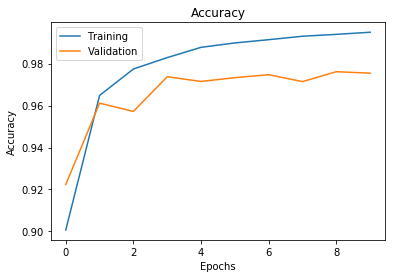

In [62]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend(['Training','Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [69]:
test_loss,test_accuracy = model.evaluate(X_test,y_test_cat)
test_accuracy

 9632/10000 [===========================>..] - ETA: 0s

0.9788

In [70]:
test_loss

0.12513903665728848